### Imports

In [1]:
import cv2
import matplotlib.pyplot as plt

In [82]:
img = cv2.imread('IMG-20240730-WA0013.jpg')


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

smoothed_gray_img = cv2.medianBlur(gray_img,9)

edges = cv2.Laplacian(smoothed_gray_img, cv2.CV_8U, ksize=5)

_, sketch =  cv2.threshold(edges, 80, 255, cv2.THRESH_BINARY_INV)

smaller_img = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))

for _ in range(15):
    smaller_img = cv2.bilateralFilter(smaller_img, 9, 100, 100)

color_painting = cv2.resize(smaller_img, (img.shape[1], img.shape[0]))

cartoon = cv2.bitwise_and(color_painting, color_painting, mask=sketch)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
color_painting = cv2.cvtColor(color_painting, cv2.COLOR_BGR2RGB)


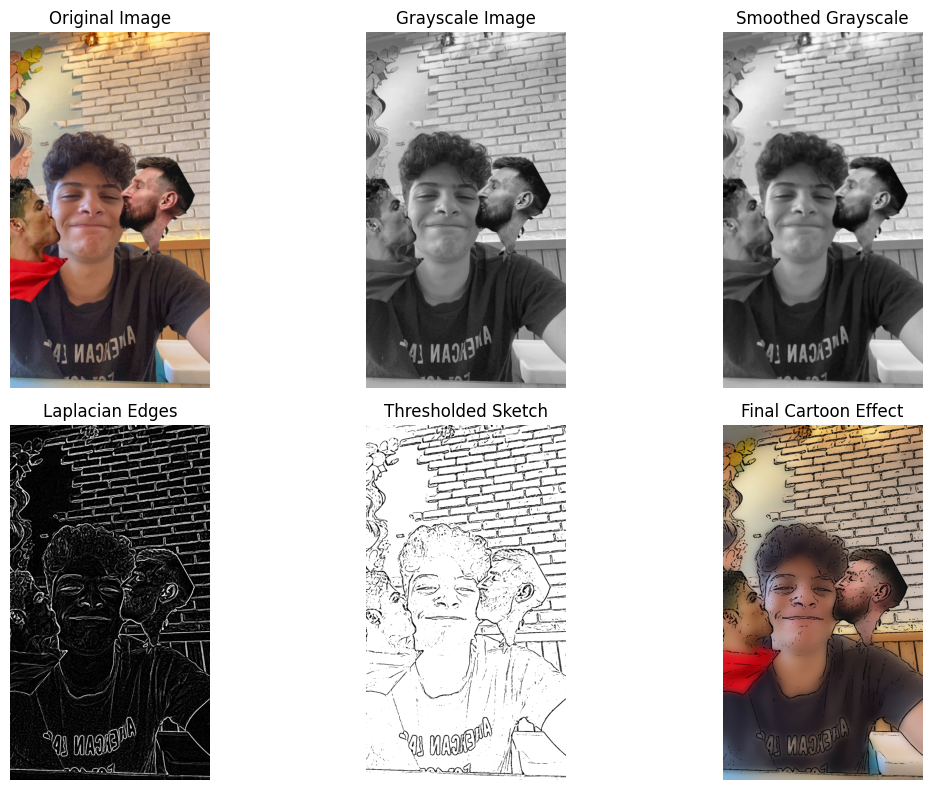

In [83]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1),plt.imshow(img),plt.title("Original Image"),plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(smoothed_gray_img, cmap="gray")
plt.title("Smoothed Grayscale")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap="gray")
plt.title("Laplacian Edges")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(sketch, cmap="gray")
plt.title("Thresholded Sketch")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cartoon)
plt.title("Final Cartoon Effect")
plt.axis("off")

plt.tight_layout()
plt.show()